In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Simulations

This notebook demonstrates the effect of control in OLS regressions.

First, let's draw a sample from a multivariate normal distribution $\begin{bmatrix}
X \\
Y \\
Z \\
\end{bmatrix} \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$ with

$\mathbf{\mu} = \begin{bmatrix}
0 \\
0 \\
0 \\
\end{bmatrix}$ and $\mathbf{\Sigma} = \begin{bmatrix}
1 & i & j \\
i & 1 & k \\
j & k & 1 \\
\end{bmatrix} = \begin{bmatrix}
1 & 0.9 & 0.9 \\
0.9 & 1 & 0.9 \\
0.9 & 0.9 & 1 \\
\end{bmatrix}
$

In [10]:
mean = np.array([0, 0, 0])
cov = np.array([[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]])
sample = np.random.multivariate_normal(mean, cov, 10000)

Note that the covariance matrix has to be [positive semidefinite](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Non-degenerate_case).
We can verify whether a matrix is positive semidefinite by checking whether [all of its eigenvalues are non-negative](https://en.wikipedia.org/wiki/Positive-definite_matrix#Characterizations).

In [11]:
eigenvalues = np.linalg.eig(cov)[0]
print(eigenvalues)

[ 0.1  2.8  0.1]


Let's get our sample x, y, and z.

In [12]:
x = sample[:,0]
y = sample[:,1]
z = sample[:,2]

Plot y against z.

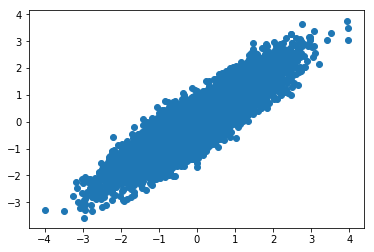

In [13]:
plt.scatter(y,z)
plt.show()

Regress y on x. The slope we get should be on average equal to $i = 0.9$. (See (29) in the Appendix section.)

In [14]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 4.234e+04
Date:                Mon, 07 May 2018   Prob (F-statistic):               0.00
Time:                        23:34:39   Log-Likelihood:                -5946.0
No. Observations:               10000   AIC:                         1.190e+04
Df Residuals:                    9998   BIC:                         1.191e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.004      1.028      0.304      -0.004       0.013
x1             0.9036      0.004    205.766      0.000       0.895       0.912
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.772
Skew:                          -0.015   Prob(JB):                        0.680
Kurtosis:                       2.969   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time, we regress y on x and z.

In [15]:
X = sample[:,[0,2]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 2.897e+04
Date:                Mon, 07 May 2018   Prob (F-statistic):               0.00
Time:                        23:34:44   Log-Likelihood:                -4640.7
No. Observations:               10000   AIC:                             9287.
Df Residuals:                    9997   BIC:                             9309.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.004      0.937      0.349      -0.004       0.011
x1             0.4655      0.009     52.300      0.000       0.448       0.483
x2             0.4842      0.009     54.609      0.000       0.467       0.502
==============================================================================
Omnibus:                        1.061   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.588   Jarque-Bera (JB):                1.032
Skew:                           0.023   Prob(JB):                        0.597
Kurtosis:                       3.020   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients for x and z should be on average equal to $\frac{i-jk}{1-j^2}$ and $\frac{-ij + k}{1-j^2}$. (See (21) in the Appendix.) In our case, $\frac{i-jk}{1-j^2} = \frac{-ij + k}{1-j^2} = 0.473$. 

In [16]:
(0.9 - 0.9*0.9)/(1-0.9**2)

0.47368421052631576

Let's loop over all posible values of $i$, $j$, and $k$ from -0.9 to 0.9 with 0.1 increments.

In [17]:
values = [i * 0.1 for i in range(-9,10)]

In [18]:
OUTPUT = []
for i in values:
    for j in values:
        for k in values:
            mean = np.array([0, 0, 0])
            cov = np.array([[1, i, j], [i, 1, k], [j, k, 1]])
            eigenvalues = np.linalg.eig(cov)[0]
            if (eigenvalues[0] >= 0) and (eigenvalues[1] >=0) and (eigenvalues[2] >= 0):
                ps = True
                sample = np.random.multivariate_normal(mean, cov, 10000)
                x = sample[:,0]
                y = sample[:,1]
                z = sample[:,2]

                x = sm.add_constant(x)
                model = sm.OLS(y, x).fit()
                b1 = model.params[1]

                X = sample[:,[0,2]]
                X = sm.add_constant(X)
                model = sm.OLS(y, X).fit()
                b2 = model.params[1]
                beta = (i - j*k)/(1 - j**2)
                gamma = (-i*j + k)/(1 - j**2)

                if b1 > b2:
                    est = "overestimated"
                if b1 < b2:
                    est = "underestimated"
            else:
                ps = False
                b1 = None
                b2 = None
                est = None
                beta = None
                gamma = None

            row = [i, j, k, b1, b2, est, beta, ps, gamma]
            OUTPUT.append(row)         

And save the results to a dataframe.

In [21]:
results = pd.DataFrame(OUTPUT, columns = ["i","j","k","b_xy", "b_xyz", "estimate", "beta", "positive semidefinite", "gamma"])

Show only the rows with a positive semidefinite covariance matrix. "b_xy" is the estimated regression slope for x without controlling for z. "b_xyz" is the estimated regression slope for x after controlling for z. $\beta = \frac{i-jk}{1-j^2}$  and $\gamma = \frac{-ij + k}{1-j^2}$ are the theoretical slopes for X and Z. You can see from this table that "b_xy" is a very close estimate of $i$, and "b_xyz" is a very close estimate of $\beta$. 

Without controling for z, bias = $\gamma j$. When $\gamma j$ is postive, "b_xy" overestimates $\beta$. When $\gamma j$ is negative, "b_xy" underestimates $\beta$.

In [23]:
results[(results['positive semidefinite'] == True)]

,i,j,k,b_xy,b_xyz,estimate,beta,positive semidefinite,gamma
16,-0.9,-0.9,0.7,-0.903779,-1.428149,overestimated,-1.421053,True,-0.578947
17,-0.9,-0.9,0.8,-0.899546,-0.949937,overestimated,-0.947368,True,-0.052632
18,-0.9,-0.9,0.9,-0.910889,-0.470107,underestimated,-0.473684,True,0.473684
33,-0.9,-0.8,0.5,-0.904951,-1.394028,overestimated,-1.388889,True,-0.611111
34,-0.9,-0.8,0.6,-0.898574,-1.171709,overestimated,-1.166667,True,-0.333333
35,-0.9,-0.8,0.7,-0.902365,-0.946889,overestimated,-0.944444,True,-0.055556
36,-0.9,-0.8,0.8,-0.904637,-0.723892,underestimated,-0.722222,True,0.222222
37,-0.9,-0.8,0.9,-0.902682,-0.502527,underestimated,-0.500000,True,0.500000
51,-0.9,-0.7,0.4,-0.899735,-1.215177,overestimated,-1.215686,True,-0.450980
52,-0.9,-0.7,0.5,-0.903222,-1.079211,overestimated,-1.078431,True,-0.254902


Some interesting cases:

In [36]:
results[(results['positive semidefinite'] == True)].tail(3)

,i,j,k,b_xy,b_xyz,estimate,beta,positive semidefinite,gamma
6856,0.9,0.9,0.7,0.896288,1.421330,underestimated,1.421053,True,-0.578947
6857,0.9,0.9,0.8,0.897350,0.923793,underestimated,0.947368,True,-0.052632
6858,0.9,0.9,0.9,0.908874,0.498256,overestimated,0.473684,True,0.473684


In [35]:
results[(results['i'] == -0.8) & (results['j'] == -0.5) & (results['k'] == 0.4)]

,i,j,k,b_xy,b_xyz,estimate,beta,positive semidefinite,gamma
450,-0.8,-0.5,0.4,-0.809704,-0.812878,overestimated,-0.8,True,0.0


# Lessons

Bivariate associations can tell neither whether a third variable is a confounder nor the direction of bias it causes. What determines these issues are conditional associations rather than unconditional associations.

# Appendix

<img src="Confounder_page_1.png">

<img src="Confounder_page_2.png">